In [1]:
import csv
import numpy as np
import pandas as pd
from PIL import Image
import PIL
import os, sys
import torch

from helper import *

c:\programdata\miniconda3\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# with open('datasets/GSE140829_raw.csv', newline='') as dataset3:
#     genes = {'ID_REF': 'ID_REF'}
    
#     reader3 = csv.DictReader(dataset3, delimiter="\t")
    
#     for row in reader3:
#         if row['ILMN_GENE'] not in genes :
#             genes[row['ILMN_GENE']] = row['PROBE_ID']

In [3]:
# data = []

# with open('datasets/GSE140829.csv', newline='') as dataset3:
#     reader = csv.reader(dataset3, delimiter="\t")
    
#     for row in reader:
#         try:
#             row[0] = genes[row[0]]
#             data.append(row)
#         except KeyError:
#             print(f"gene {row[0]} does not exist!")

In [4]:
# with open('datasets/GSE140829.csv', 'w', newline='\n') as f:
#     writer = csv.writer(f, delimiter="\t", quotechar='"', quoting=csv.QUOTE_MINIMAL)
#     writer.writerows(data)

In [5]:
commonGenes = []
set2 = []
set3 = []

dataset1 = open('datasets/GSE63060.csv', newline='')
dataset2 = open('datasets/GSE63061.csv', newline='')
dataset3 = open('datasets/GSE140829.csv', newline='')

reader1 = csv.reader(dataset1, delimiter="\t")
reader2 = csv.reader(dataset2, delimiter="\t")
reader3 = csv.reader(dataset3, delimiter="\t")

for row in reader2:
    set2.append(row[0])
    
for row in reader3:
    set3.append(row[0])

for row in reader1:
    if row[0] in set2 and row[0] in set3:
        commonGenes.append(row[0])

dataset1.close()
dataset2.close()
dataset2.close()

In [6]:
print(len(commonGenes))

10678


In [7]:
set1 = []
set2 = []
set3 = []

dataset1 = open('datasets/GSE63060.csv', newline='')
dataset2 = open('datasets/GSE63061.csv', newline='')
dataset3 = open('datasets/GSE140829.csv', newline='')

reader1 = csv.reader(dataset1, delimiter="\t")
reader2 = csv.reader(dataset2, delimiter="\t")
reader3 = csv.reader(dataset3, delimiter="\t")

for row in reader1:
    if row[0] in commonGenes and row not in set1:
        set1.append(row)
        
for row in reader2:
    if row[0] in commonGenes and row not in set2:
        set2.append(row)
        
for row in reader3:
    if row[0] in commonGenes and row not in set3:
        set3.append(row)
    
set1.sort(key=lambda x: x[0])
set2.sort(key=lambda x: x[0])
set3.sort(key=lambda x: x[0])

data1 = []
data2 = []
data3 = []
    
for i in range(len(set1[0])):
    rowData = []

    for row in set1:
        rowData.append(row[i])

    data1.append(rowData)
    
for i in range(len(set2[0])):
    rowData = []

    for row in set2:
        rowData.append(row[i])

    data2.append(rowData)
    
for i in range(len(set3[0])):
    rowData = []

    for row in set3:
        rowData.append(row[i])

    data3.append(rowData)

dataset1.close()
dataset2.close()
dataset3.close()

In [8]:
print(len(data3[0]))

10678


In [12]:
conditions = {}

dataset1 = open('datasets/GSE63060info.csv', newline='')
dataset2 = open('datasets/GSE63061info.csv', newline='')
dataset3 = open('datasets/GSE140829info.csv', newline='')

reader1 = csv.DictReader(dataset1, delimiter="\t")
reader2 = csv.DictReader(dataset2, delimiter="\t")
reader3 = csv.DictReader(dataset3, delimiter="\t")

conData = []

for row in reader1:
    conData.append(row)
        
for row in reader2:
    conData.append(row)
    
for row in reader3:
    conData.append(row)
    
conditions = merge(conData[0], conData[1])
conditions = merge(conditions, conData[2])

dataset1.close()
dataset2.close()
dataset3.close()

In [13]:
# print(conditions)

In [14]:
for i in range(len(data1[0])):
    if data1[0][i] != data2[0][i]:
        print(data1[0][i])
        print(i)
        break

In [15]:
if data1[0][0] == "ID_REF":
    del data1[0]

if data2[0][0] == "ID_REF":
    del data2[0]

if data3[0][0] == "ID_REF":
    del data3[0]

In [16]:
for i in range(len(data1)):
    try:
        if data1[i][0] not in conditions.keys():
            print(data1[i][0])
            print(i)
            
            del data1[i]
    except:
        pass

4856076038_D
208


In [17]:
# data.pop(0)

In [18]:
import random

random.shuffle(data1)
random.shuffle(data2)
random.shuffle(data3)

In [19]:
i = 0

while i < len(data1):
    if conditions[data1[i][0]] == "MCI":
        data1.pop(i)
    
    else:
        i += 1

In [20]:
i = 0

while i < len(data2):
    if conditions[data2[i][0]] == "MCI":
        data2.pop(i)
    
    else:
        i += 1

In [21]:
i = 0

while i < len(data3):
    if conditions[data3[i][0]] == "MCI":
        data3.pop(i)
    
    else:
        i += 1

In [22]:
def toFloat(data):
    for i in range(len(data)):
        for j in range(1, len(data[0])):
            data[i][j] = float(data[i][j])
            
    return data

In [23]:
def getMean(data):
    mean = []
    
    for j in range(len(data[0]) - 1):
        total = 0.0
        
        for i in range(len(data)):
            total += data[i][j + 1]
            
        mean.append(total / len(data))
        
    return mean

In [24]:
def getVariance(data):
    variance = []
    
    for j in range(len(data[0]) - 1):
        total = 0.0
        
        for i in range(len(data)):
            total += abs(data[i][j + 1])
            
        variance.append(total / len(data))
        
    return variance

In [25]:
def getRowMean(data):
    mean = []
    
    for i in range(len(data)):
        total = 0.0
        
        for j in range(1, len(data[i])):
            total += data[i][j]
            
        mean.append(total / (len(data[i]) - 1))
        
    return mean

In [26]:
def getRowVariance(data):
    mean = []
    
    for i in range(len(data)):
        total = 0.0
        
        for j in range(1, len(data[i])):
            total += abs(data[i][j])
            
        mean.append(total / (len(data[i]) - 1))
        
    return mean

In [27]:
def normalize(data):
    mean = getMean(data)
    
    for j in range(len(data[0]) - 1):
        for i in range(len(data)):
            data[i][j + 1] -= mean[j]
            
    variance = getVariance(data)
    
    for j in range(len(data[0]) - 1):
        for i in range(len(data)):
            data[i][j + 1] /= variance[j]
            data[i][j + 1] /= 4
            data[i][j + 1] += 1

    return data

In [28]:
def normalizeRow(data):
    mean = getMean(data)
    
    for i in range(len(data)):
        for j in range(len(data[0]) - 1):
            data[i][j + 1] -= mean[j]
            
    variance = getVariance(data)
    
    for i in range(len(data)):
        for j in range(len(data[0]) - 1):
            data[i][j + 1] /= variance[j]
            data[i][j + 1] /= 4
            data[i][j + 1] += 1

    return data

In [29]:
data1 = toFloat(data1)
data2 = toFloat(data2)
data3 = toFloat(data3)

In [30]:
data = data1 + data2 + data3
data = normalize(data)
data = normalizeRow(data)
data = normalize(data)
random.shuffle(data)

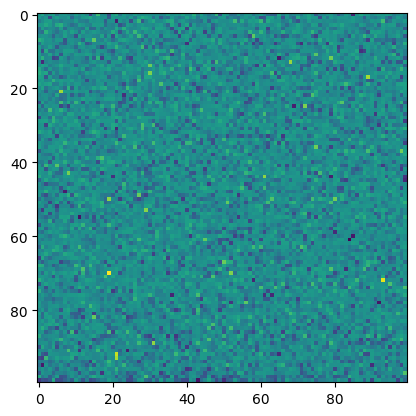

In [31]:
import matplotlib.pyplot as plt

plt.imshow(torch.Tensor(data1[1][1:10001]).view(100, 100))

In [32]:
for item in data:
    try:
        item[0] = getCondition(conditions[item[0]])
    except:
        pass

In [33]:
ad = 0
ctl = 0

for i in range(len(data)):
    if data[i][0] == 1:
        ad += 1
    else:
        ctl += 1

In [34]:
print(ad)
print(ctl)

483
468


In [35]:
train = data[:761]
test = data[761:]

In [36]:
rValues = getRValues(train, conditions, ctl, ad, test)

In [37]:
FINAL_LEN = 1024
BLOCK_SIZE = 128
STEP_SIZE = 6

In [38]:
rLen = FINAL_LEN * STEP_SIZE

del rValues[rLen:]
random.shuffle(rValues)
print(len(rValues))

6144


In [39]:
sortedTrain = []

for i in range(len(train)):
    rowData = []
    
    for j in range(len(rValues)):
        rowData.append(train[i][rValues[j][0] + 1])
        
    rowData.extend(rowData)
    rowData.insert(0, float(train[i][0]))
    
    sortedTrain.append(rowData)
    
sortedTest = []

for i in range(len(test)):
    rowData = []
    
    for j in range(len(rValues)):
        rowData.append(test[i][rValues[j][0] + 1])
        
    rowData.extend(rowData)
    rowData.insert(0, float(test[i][0]))
    
    sortedTest.append(rowData)

In [40]:
print(len(rowData))
print(len(sortedTest))
print(len(sortedTrain))

12289
190
761


In [41]:
sortedTest = toFloat(sortedTest)
sortedTrain = toFloat(sortedTrain)

In [42]:
with open('datasets/train_full.csv', 'w') as f:
    writer = csv.writer(f, quotechar='"', quoting=csv.QUOTE_MINIMAL)
    writer.writerows(sortedTrain)
    
with open('datasets/test_full.csv', 'w') as f:
    writer = csv.writer(f, quotechar='"', quoting=csv.QUOTE_MINIMAL)
    writer.writerows(sortedTest)

In [43]:
headers = ['labels'] + list(range(len(rValues) * 2))

train = pd.read_csv('datasets/train_full.csv', names=headers)
test = pd.read_csv('datasets/test_full.csv', names=headers)

In [44]:
X_train = train.drop(["labels"], axis=1)
y_train = train["labels"]

X_test = test.drop(["labels"], axis=1)
y_test = test["labels"]

In [45]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

LDAtrain = [list(y_train)]
LDAtest = [list(y_test)]

for i in range(FINAL_LEN):
    X_Train_Sub = X_train[list(range(STEP_SIZE * i, STEP_SIZE * i + BLOCK_SIZE))]
    X_Test_Sub = X_test[list(range(STEP_SIZE * i, STEP_SIZE * i + BLOCK_SIZE))]
    
    lda_model = LDA(n_components = 1)
    
    X_train_lda = lda_model.fit_transform(X_Train_Sub, y_train)
    X_test_lda = lda_model.transform(X_Test_Sub)
    
    LDAtrain.append(X_train_lda)
    LDAtest.append(X_test_lda)

In [46]:
print(len(LDAtrain), len(y_train))

1025 761


In [47]:
train = []
test = []

In [48]:
for i in range(len(LDAtrain[0])):
    rowData = []

    for row in LDAtrain:
        rowData.append(float(row[i]))

    train.append(rowData)

In [49]:
for i in range(len(LDAtest[0])):
    rowData = []

    for row in LDAtest:
        rowData.append(float(row[i]))

    test.append(rowData)

In [50]:
rValues = getRValues(train, conditions, ctl, ad, test)

In [51]:
data = train + test

In [52]:
data = normalizeRow(data)
data = normalize(data)

In [53]:
train = data[:761]
test = data[761:]

In [54]:
print(len(test))
print(len(train))

190
761


In [55]:
print(len(train[0]))

1025


In [56]:
with open('datasets/train.csv', 'w') as f:
    writer = csv.writer(f, quotechar='"', quoting=csv.QUOTE_MINIMAL)
    writer.writerows(train)
    
with open('datasets/test.csv', 'w') as f:
    writer = csv.writer(f, quotechar='"', quoting=csv.QUOTE_MINIMAL)
    writer.writerows(test)

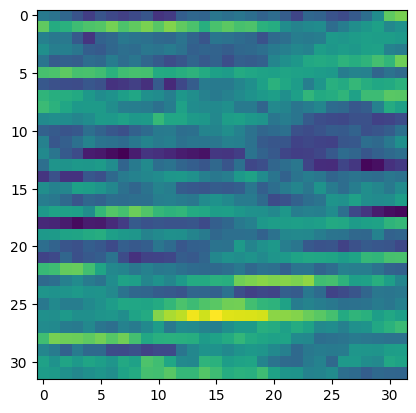

In [57]:
plt.imshow(torch.Tensor(test[1][1:1025]).view(32, 32))

In [58]:
print(test[1][0])

0.0
